<a href="https://colab.research.google.com/github/ChatMadhu/Wenner-Array-current-profile-classification/blob/main/Classification_using_Voltage_profile_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [66]:
cp = pd.read_csv('/content/Neural Network Sensor data - Copy.csv')
print(cp)

         Date      Time   Temp  V(10mA)  V(10.5mA)  V(11mA)  V(11.5mA)  \
0    5/8/2022  16:37:52  29.25     7.70       8.02     8.37       8.66   
1    5/8/2022  16:53:10  29.25     8.80       9.65    10.01      10.11   
2    5/8/2022  17:14:05  29.13     8.59       9.01     9.37       9.72   
3    5/8/2022  17:15:43  28.94     6.88       7.10     7.42       7.45   
4    5/8/2022  17:16:47  29.13     6.92       7.27     7.42       7.81   
..        ...       ...    ...      ...        ...      ...        ...   
109  5/9/2022  10:49:40  28.13     7.95       8.27     8.73       9.08   
110  5/9/2022  10:50:52  28.06     9.12       9.58    10.12      10.66   
111  5/9/2022  10:51:39  28.06     7.77       8.13     8.45       8.80   
112  5/9/2022  10:52:22  28.06     7.42       7.77     8.20       8.45   
113  5/9/2022  10:53:06  28.06     6.81       7.17     7.24       7.77   

     V(12mA)  V(12.5mA)  V(13mA)  V(13.5mA)  V(14mA)  V(14.5mA)  \
0       9.08       9.44     9.83      10.04 

In [67]:
cp.shape

(114, 15)

In [68]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           114 non-null    object 
 1   Time           114 non-null    object 
 2   Temp           114 non-null    float64
 3   V(10mA)        114 non-null    float64
 4   V(10.5mA)      114 non-null    float64
 5   V(11mA)        114 non-null    float64
 6   V(11.5mA)      114 non-null    float64
 7   V(12mA)        114 non-null    float64
 8   V(12.5mA)      114 non-null    float64
 9   V(13mA)        114 non-null    float64
 10  V(13.5mA)      114 non-null    float64
 11  V(14mA)        114 non-null    float64
 12  V(14.5mA)      114 non-null    float64
 13  sample number  114 non-null    int64  
 14  salt amount    114 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 13.5+ KB


In [69]:
X = cp[['Temp','V(10mA)','V(10.5mA)','V(11mA)','V(11.5mA)','V(12mA)','V(12.5mA)','V(13mA)','V(13.5mA)','V(14mA)','V(14.5mA)']]
X.head()

,Temp,V(10mA),V(10.5mA),V(11mA),V(11.5mA),V(12mA),V(12.5mA),V(13mA),V(13.5mA),V(14mA),V(14.5mA)
0,29.25,7.70,8.02,8.37,8.66,9.08,9.44,9.83,10.04,10.40,10.57
1,29.25,8.80,9.65,10.01,10.11,10.25,10.72,11.07,11.43,11.85,12.35
2,29.13,8.59,9.01,9.37,9.72,10.15,10.54,10.89,11.25,11.60,12.03
3,28.94,6.88,7.10,7.42,7.45,8.09,8.34,8.69,9.01,9.30,9.55
4,29.13,6.92,7.27,7.42,7.81,8.16,8.45,8.76,9.01,9.26,9.69


In [70]:
X= X.values
Y = cp[['sample number']]
Y.head()

,sample number
0,1
1,1
2,1
3,1
4,1


In [71]:
#Standardize data
scaler = MinMaxScaler()

scaler.fit(Y)

Y_standardized = scaler.transform(Y)

print(Y_standardized)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [72]:

scaler = MinMaxScaler()
XX =pd.DataFrame(scaler.fit_transform(X))

XX.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.600,0.292639,0.658998,0.305994,0.314873,0.339056,0.323362,0.361227,0.712562,0.732911,0.728463
1,0.600,0.490126,0.792933,0.564669,0.544304,0.506438,0.505698,0.534170,0.811214,0.835095,0.851137
2,0.552,0.452424,0.740345,0.463722,0.482595,0.492132,0.480057,0.509066,0.798439,0.817477,0.829083
3,0.476,0.145422,0.583402,0.156151,0.123418,0.197425,0.166667,0.202232,0.639461,0.655391,0.658167
4,0.552,0.152603,0.597371,0.156151,0.180380,0.207439,0.182336,0.211994,0.639461,0.652572,0.667815


In [73]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state= 42)
  kmeans.fit(XX)

  wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show>

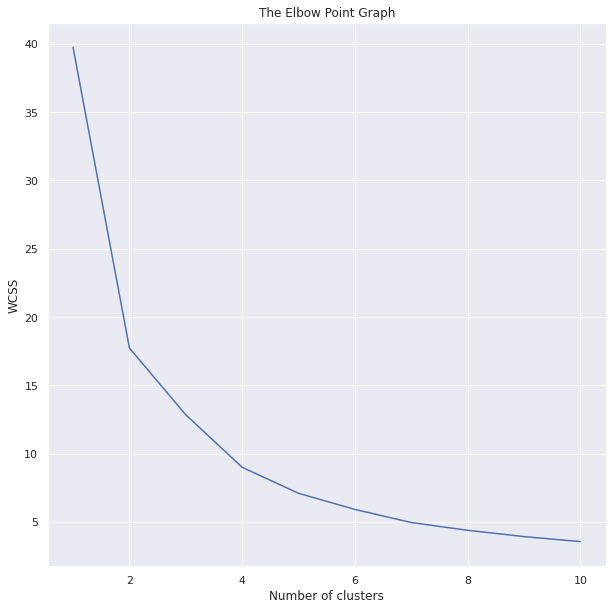

In [74]:
#plot an elbow graph

plt.figure(figsize=(10,10))
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

#Lets consider optimum number of clusters is 4.

In [75]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state= 0)

#we have to return a label for each data point based on their clusters

In [76]:
Z = kmeans.fit_predict(XX)
print(Z)

[2 2 2 0 0 2 0 0 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0 0 0 1 0 0 0 2 0 0 0 2 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 0 0 0 0 2 0 0 0 0 1 2 0 1 1 0
 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 3 3 1 1 1 2 2 2 0 0 2 2 1
 2 0 0]


In [77]:
XX= XX.values

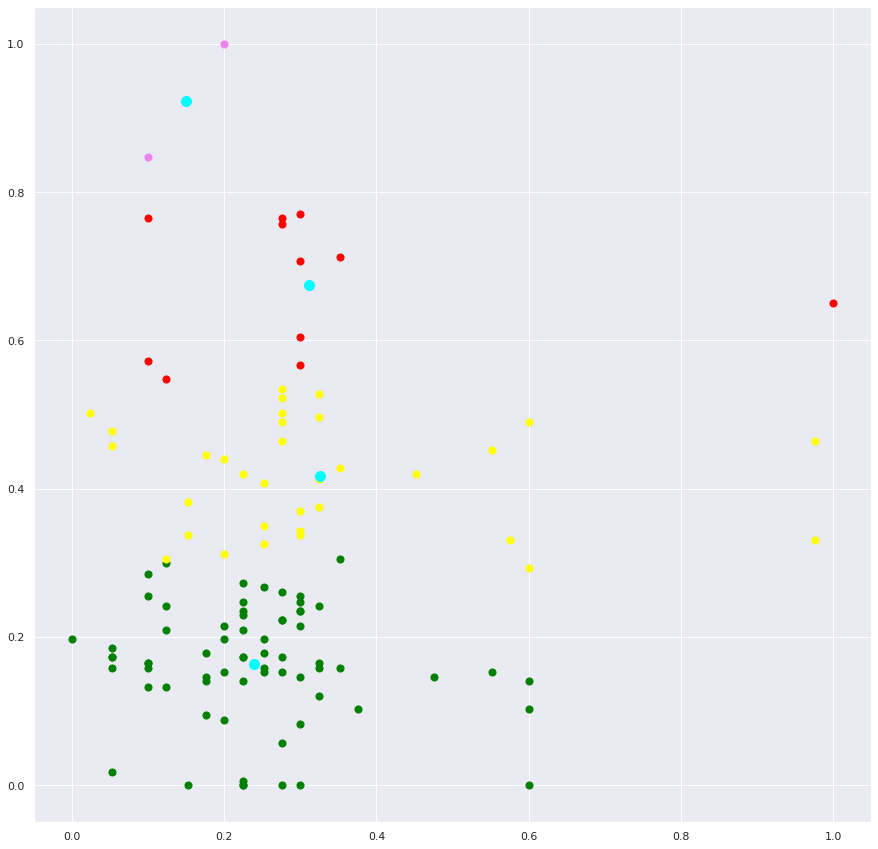

In [79]:
#potting all the clusters and the centoids

plt.figure(figsize=(15,15))

plt.scatter(XX[Z==0,0], XX[Z==0,1], s=50, c='green', label = 'Cluster 1')
plt.scatter(XX[Z==1,0], XX[Z==1,1], s=50, c='red', label = 'Cluster 2')
plt.scatter(XX[Z==2,0], XX[Z==2,1], s=50, c='yellow', label = 'Cluster 3')
plt.scatter(XX[Z==3,0], XX[Z==3,1], s=50, c='violet', label = 'Cluster 4')


#plot the centroids

plt.scatter (kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label= 'Centroids')

            
plt.show()